In [1]:
import rasterio
from rasterio.plot import show,reshape_as_image,reshape_as_raster,show

import matplotlib.pyplot as plt

In [54]:
# "Iowa_2021_july_8192-4096"

# "Iowa_2021_july_1280-3072"

image_name = "Indiana_2017_july_4096-1792"
path = "/home/jovyan/MSC_Thesis/MSc_Thesis_2023/Input/sentinel/test_data_from_drive/patches_all/normalised_test/"+image_name+".tif"
model_name = "model_BSize_350_NEpochs_30_2023-11-05 11:57:12.262151"
unet_test = "/home/jovyan/MSC_Thesis/MSc_Thesis_2023/Output/Evaluation/unet_segmented/"+model_name+"/"+image_name+".png"
unet_segmented_tif = "/home/jovyan/MSC_Thesis/MSc_Thesis_2023/Output/Evaluation/unet_segmented/"+model_name+"/"+image_name+".tif"
# path = "Output/saliency_maps/gradCAM_mask_sent/test/Indiana_2017_july_3072-5632.tif"
# file = rasterio.open('Input/sentinel/test_data_from_drive/patches_all/test/Indiana_2019_july_3328-2560.tif')
file = rasterio.open(path)
segmented = rasterio.open(unet_segmented_tif)

In [55]:
unet_test

'/home/jovyan/MSC_Thesis/MSc_Thesis_2023/Output/Evaluation/unet_segmented/model_BSize_350_NEpochs_30_2023-11-05 11:57:12.262151/Indiana_2017_july_4096-1792.png'

In [56]:
file.count

13

In [57]:
print("Patch max:",file.read()[0:12,:,:].max())
print("Segmented max:",segmented.read().max())

Patch max: 0.24086574
Segmented max: 0.31672227


(-0.5, 255.5, 255.5, -0.5)

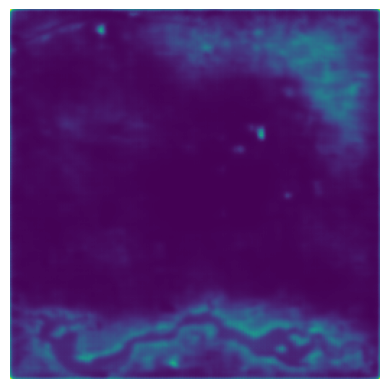

In [58]:
# output_image = plt.imread(unet_test)
plt.imshow(segmented.read()[0,:,:],vmin=segmented.read().min(), vmax=segmented.read().max())
plt.axis("off")

(-0.5, 255.5, 255.5, -0.5)

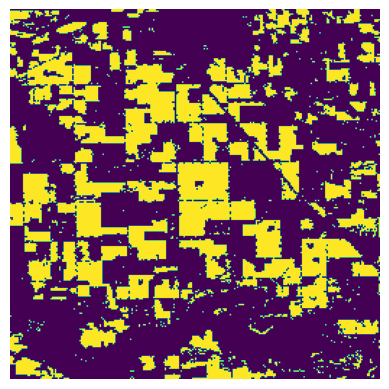

In [59]:
plt.imshow(file.read()[12])
plt.axis("off")

In [67]:
rast = file.read()
rast_img = reshape_as_image(rast)
rast_img.shape

(256, 256, 15)

In [39]:
# # plt.imshow(rast_img,cmap="jet")
# # plt.axis("off")

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# ax = plt.subplot()
# divider = make_axes_locatable(ax)
# cax = divider.append_axes("right", size="5%", pad=0.05)
# im = ax.imshow(rast_img[:,:,12:15],cmap="jet")
# cb = plt.colorbar(im, cax=cax)
# cb.set_label('Importance Level', rotation=90,size=15)
# ax.axis("off")
# plt.savefig("Output/saliency_maps/gradCAM_nomask_sent/output_sal.png")

In [30]:
file.shape

(256, 256)

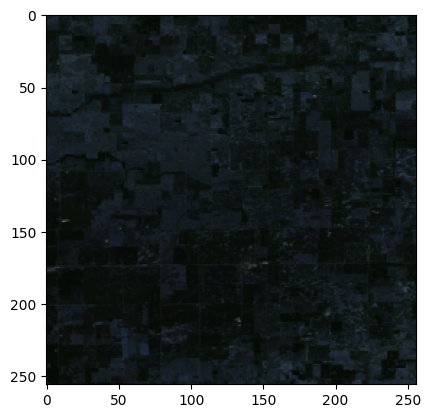

<AxesSubplot: >

In [15]:
show(file.read()[1:4],cmap="jet")

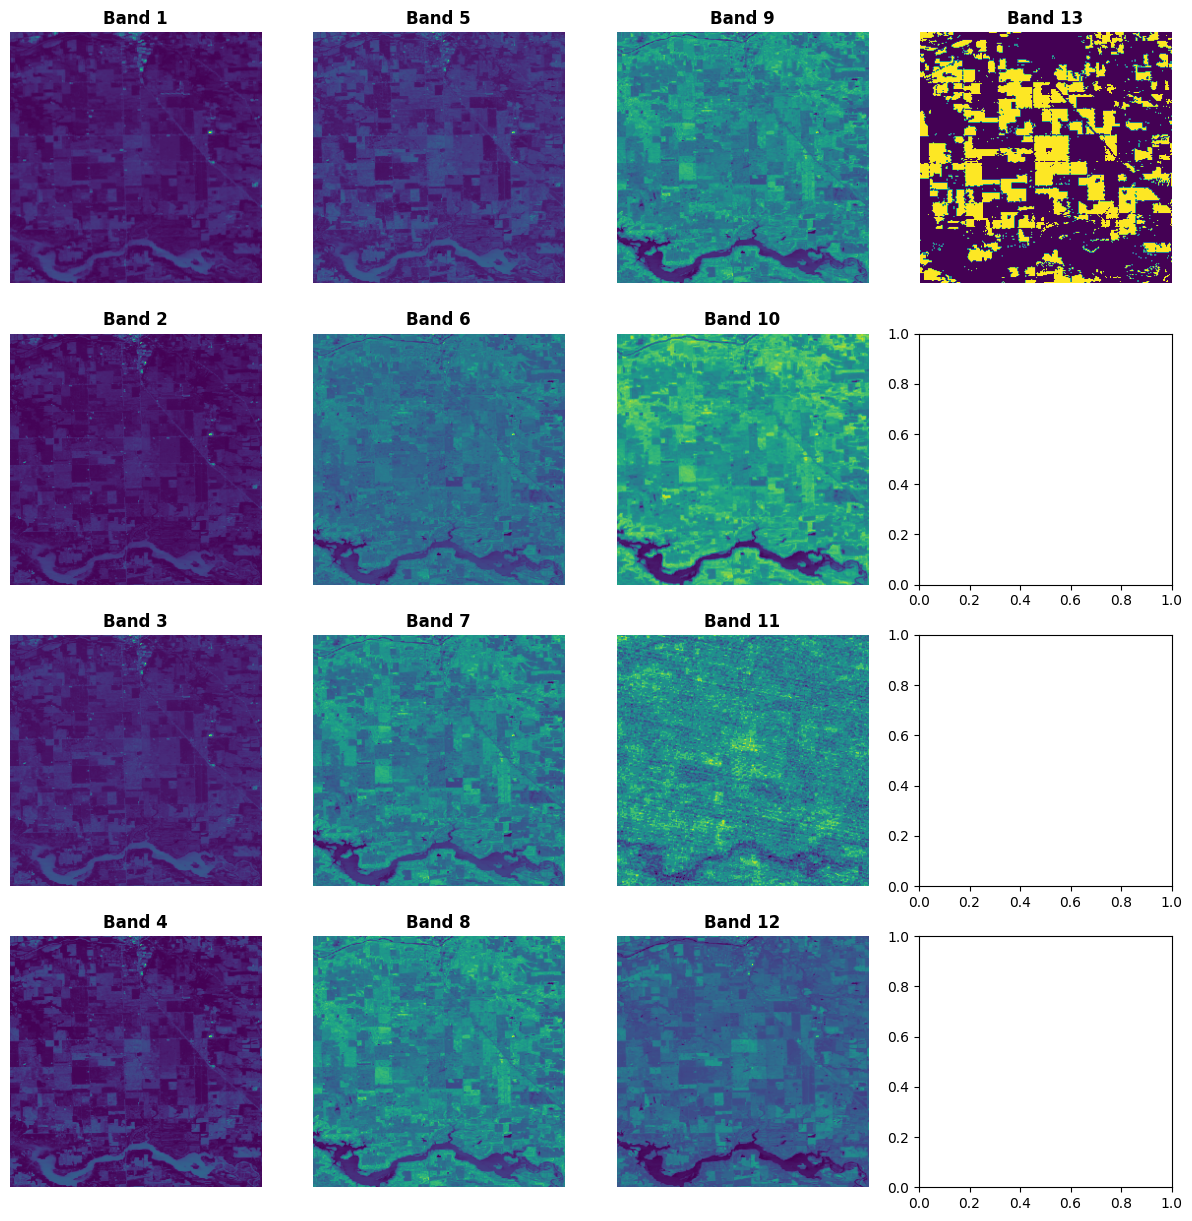

In [60]:
fig, ax = plt.subplots(4,4,figsize=(15,15))

col = 0 
row = 0
for i in range(1,file.count+1):
#     print(row,col)
    
    show((file,i),ax = ax[row,col],title = "Band "+str(i))
    ax[row,col].axis("off")
    row+=1
    if i >= 4 and i %4==0:
        row = 0
        col+=1
#     col+=1

In [25]:
file.read()[0:12].shape

(12, 256, 256)